# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv("Mental Health Data.csv")

# Data Info

In [3]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
df.tail()

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [7]:
df.isnull().sum()

Unnamed: 0      0
statement     362
status          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df["status"].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

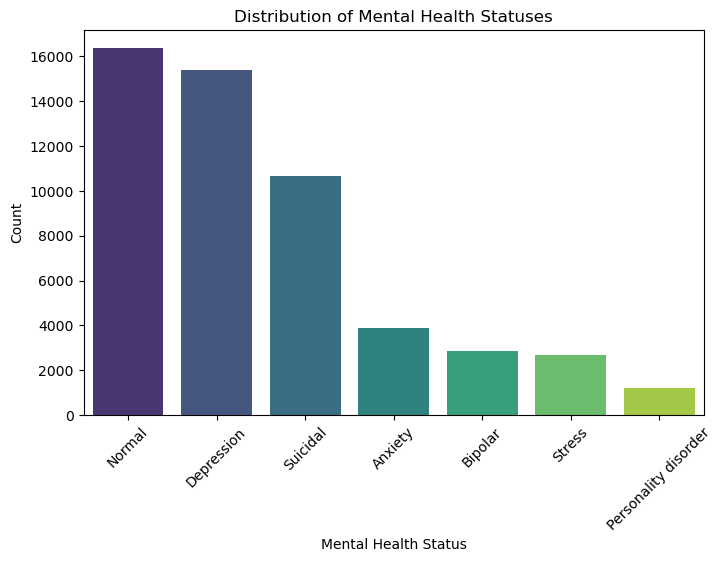

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='viridis')
plt.title("Distribution of Mental Health Statuses")
plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

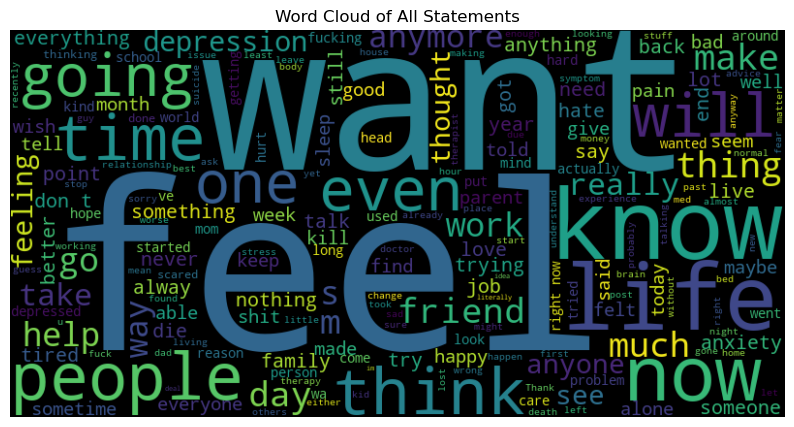

In [11]:
all_text = " ".join(statement for statement in df['statement'].astype(str))

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="viridis").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of All Statements")
plt.axis("off")
plt.show()

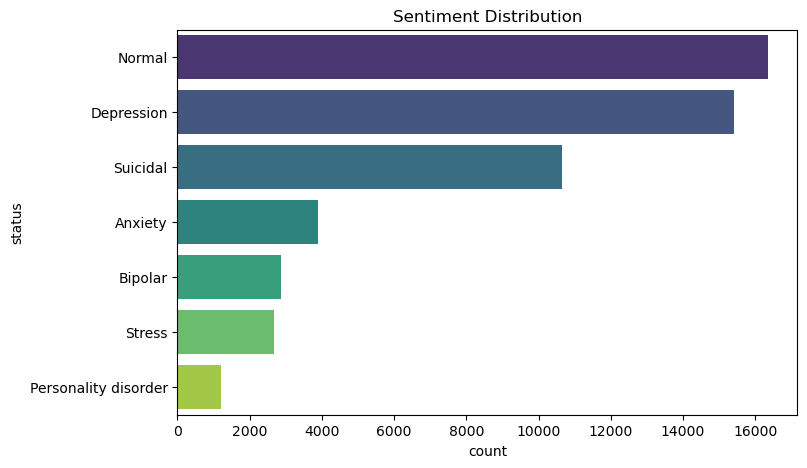

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(y=df["status"], order=df["status"].value_counts().index, palette='viridis') 
plt.title("Sentiment Distribution")
plt.show()

In [13]:
df['text_length'] = df['statement'].astype(str).apply(len)

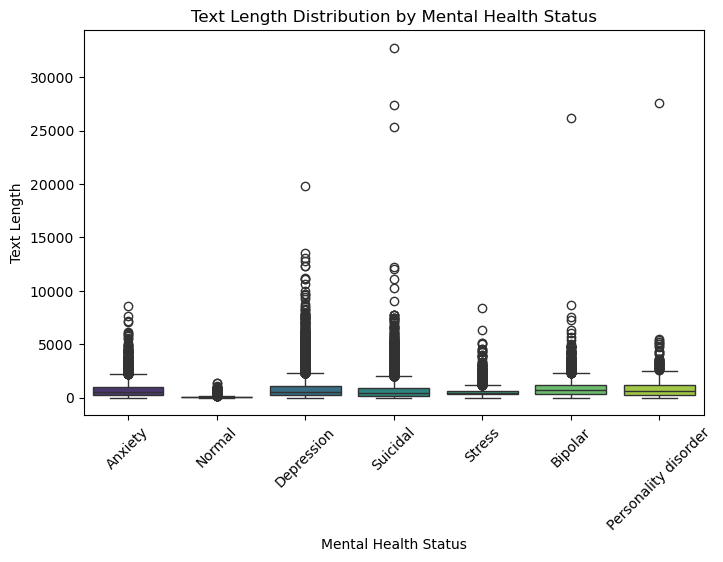

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='status', y='text_length', palette='viridis')
plt.title("Text Length Distribution by Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anubhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


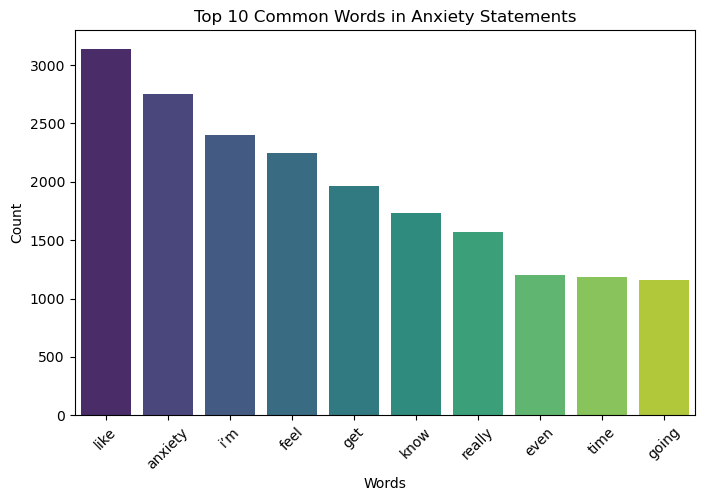

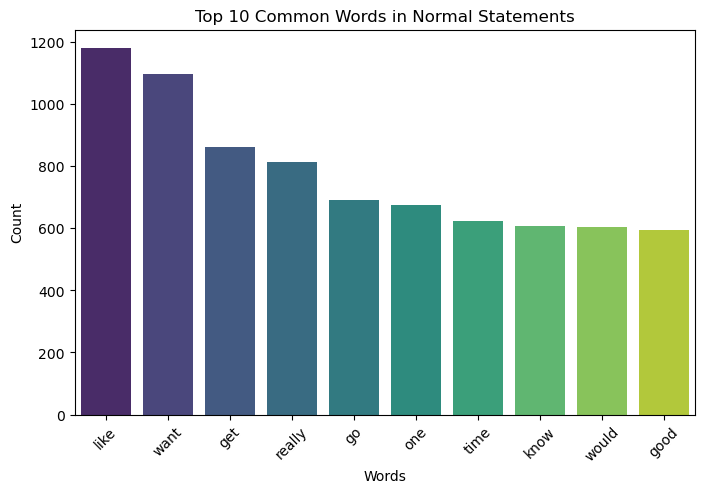

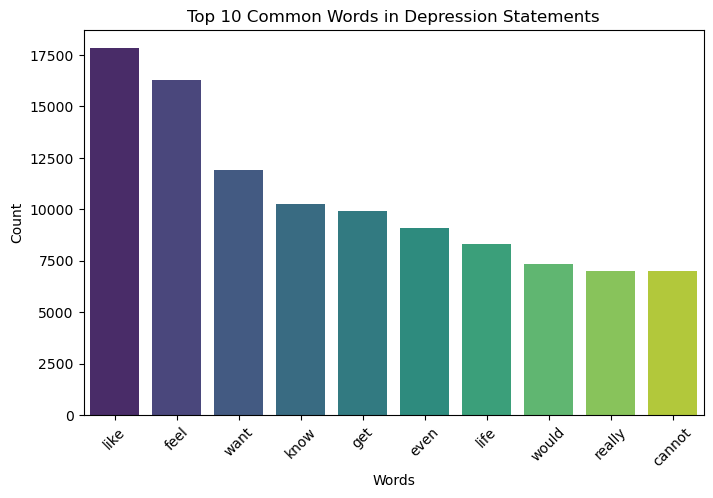

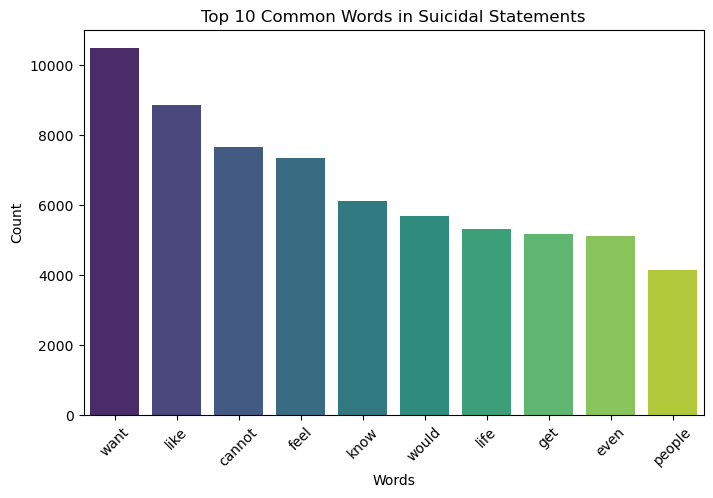

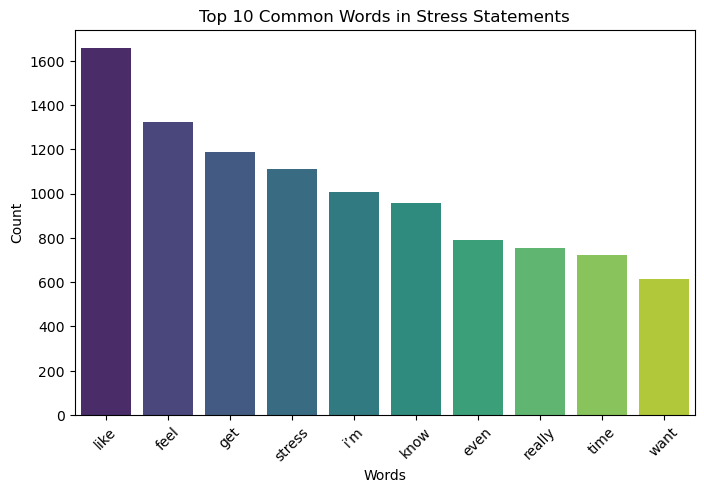

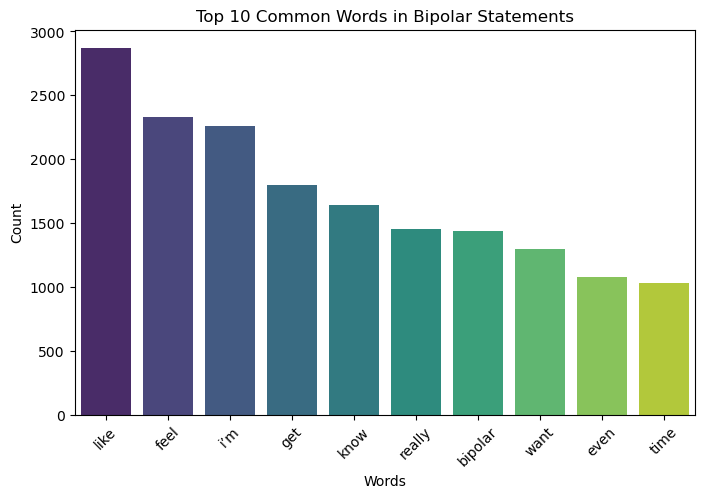

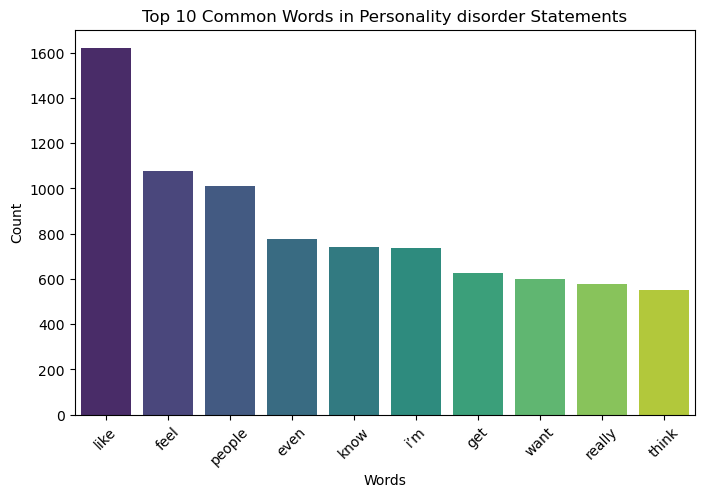

In [15]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def most_common_words(text):
    words = text.lower().split()
    words = [word for word in words if word not in stopwords.words('english')]
    word_counts = Counter(words)
    return word_counts.most_common(10)

for status in df['status'].unique():
    status_text = " ".join(df[df['status'] == status]['statement'].astype(str))
    common_words = most_common_words(status_text)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.title(f"Top 10 Common Words in {status} Statements")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Feature Enginnering

In [16]:
df = df.dropna(subset=['statement'])

In [17]:
print("Missing values before dropping:", df['statement'].isnull().sum())

Missing values before dropping: 0


In [18]:
print("Missing values after dropping:", df['statement'].isnull().sum())
print("Shape after dropping missing values:", df.shape)

Missing values after dropping: 0
Shape after dropping missing values: (52681, 4)


In [19]:
import re
import string

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove new lines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

df['statement'] = df['statement'].astype(str).apply(clean_text)

In [20]:
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [21]:
X = df['statement']
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [23]:
df.head()

,Unnamed: 0,statement,status,text_length
0,0,oh my gosh,0,10
1,1,trouble sleeping confused mind restless heart ...,0,64
2,2,all wrong back off dear forward doubt stay in ...,0,78
3,3,ive shifted my focus to something else but im ...,0,61
4,4,im restless and restless its been a month now ...,0,72


# Buliding Model

### LogisticRegression

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [25]:
y_pred=log_reg.predict(X_test_tfidf)

In [26]:
accuracy_score(y_train, log_reg.predict(X_train_tfidf))

0.8146829916476841

In [27]:
accuracy_score(y_test, log_reg.predict(X_test_tfidf))

0.7574262123944197

In [28]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_tfidf))

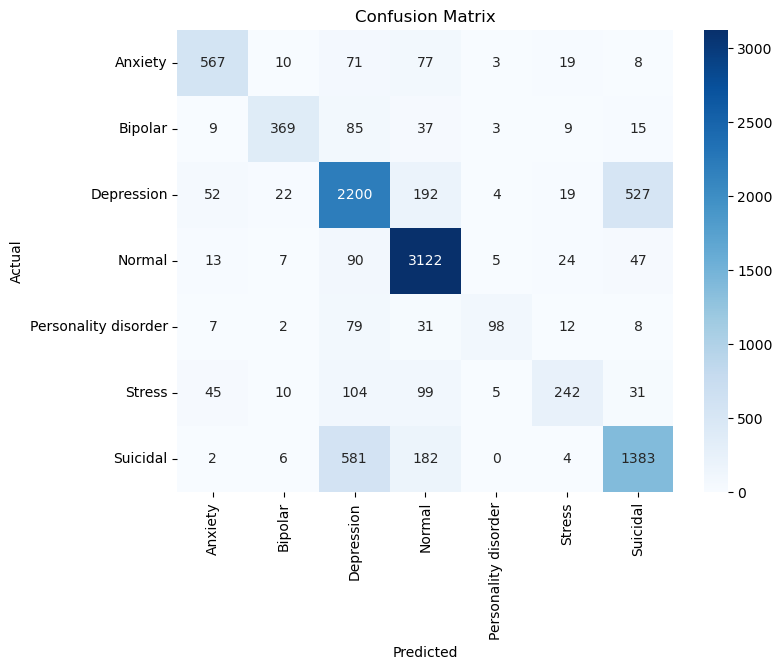

In [29]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       755
           1       0.87      0.70      0.77       527
           2       0.69      0.73      0.71      3016
           3       0.83      0.94      0.89      3308
           4       0.83      0.41      0.55       237
           5       0.74      0.45      0.56       536
           6       0.68      0.64      0.66      2158

    accuracy                           0.76     10537
   macro avg       0.78      0.66      0.70     10537
weighted avg       0.76      0.76      0.75     10537



### KNN

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [32]:
y_pred=knn.predict(X_test_tfidf)

In [33]:
accuracy_score(y_train, knn.predict(X_train_tfidf))

0.34994305239179957

In [34]:
accuracy_score(y_test, knn.predict(X_test_tfidf))

0.33368131346683116

In [35]:
knn_acc = accuracy_score(y_test, knn.predict(X_test_tfidf))

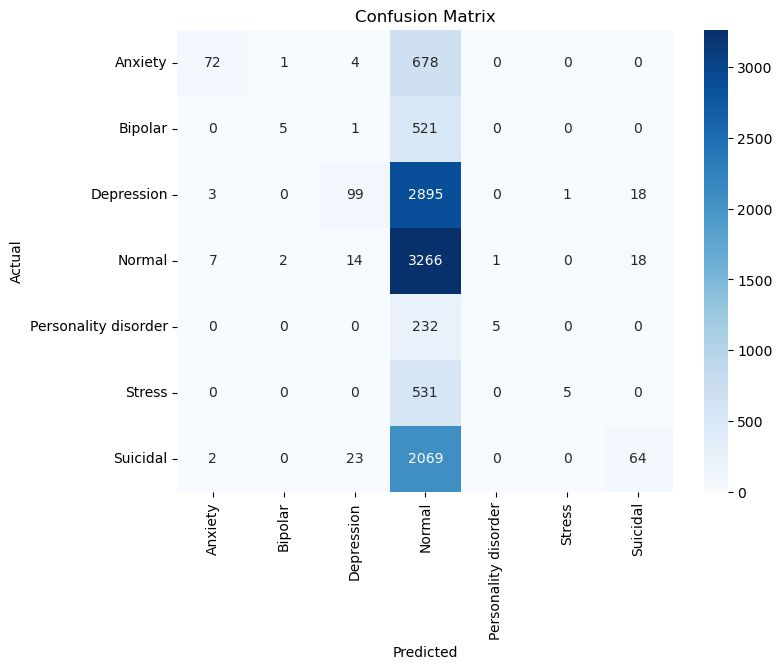

In [36]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.10      0.17       755
           1       0.62      0.01      0.02       527
           2       0.70      0.03      0.06      3016
           3       0.32      0.99      0.48      3308
           4       0.83      0.02      0.04       237
           5       0.83      0.01      0.02       536
           6       0.64      0.03      0.06      2158

    accuracy                           0.33     10537
   macro avg       0.69      0.17      0.12     10537
weighted avg       0.59      0.33      0.20     10537



### Decision Tree

In [38]:
DT = DecisionTreeClassifier()
DT.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [39]:
y_pred=DT.predict(X_test_tfidf)

In [40]:
accuracy_score(y_train, DT.predict(X_train_tfidf))

0.9975322703113136

In [41]:
accuracy_score(y_test, DT.predict(X_test_tfidf))

0.6607193698396128

In [42]:
dt_acc = accuracy_score(y_test, DT.predict(X_test_tfidf))

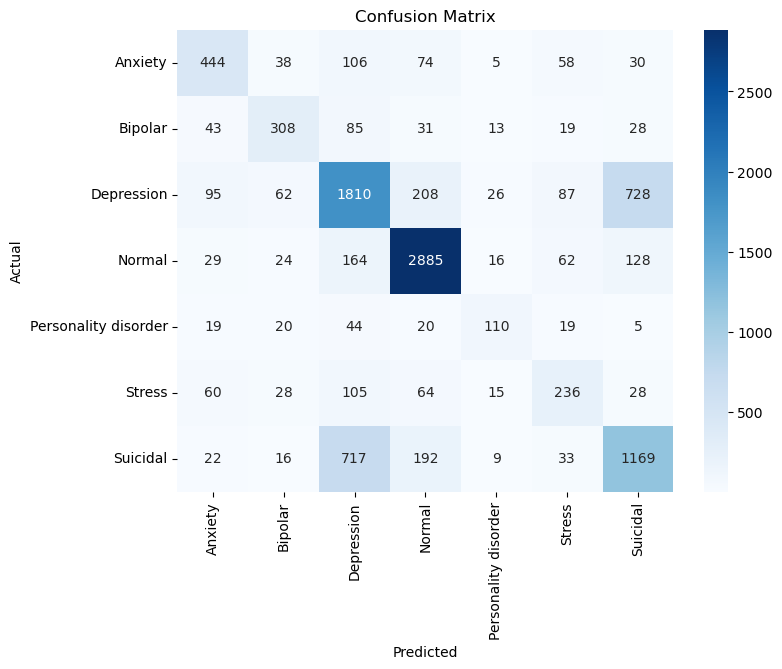

In [43]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       755
           1       0.62      0.58      0.60       527
           2       0.60      0.60      0.60      3016
           3       0.83      0.87      0.85      3308
           4       0.57      0.46      0.51       237
           5       0.46      0.44      0.45       536
           6       0.55      0.54      0.55      2158

    accuracy                           0.66     10537
   macro avg       0.61      0.58      0.59     10537
weighted avg       0.66      0.66      0.66     10537



### Random Forest

In [45]:
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [46]:
y_pred=rand_clf.predict(X_test_tfidf)

In [47]:
accuracy_score(y_train, rand_clf.predict(X_train_tfidf))

0.9975085421412301

In [48]:
accuracy_score(y_test, rand_clf.predict(X_test_tfidf))

0.7215526240865522

In [49]:
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test_tfidf))

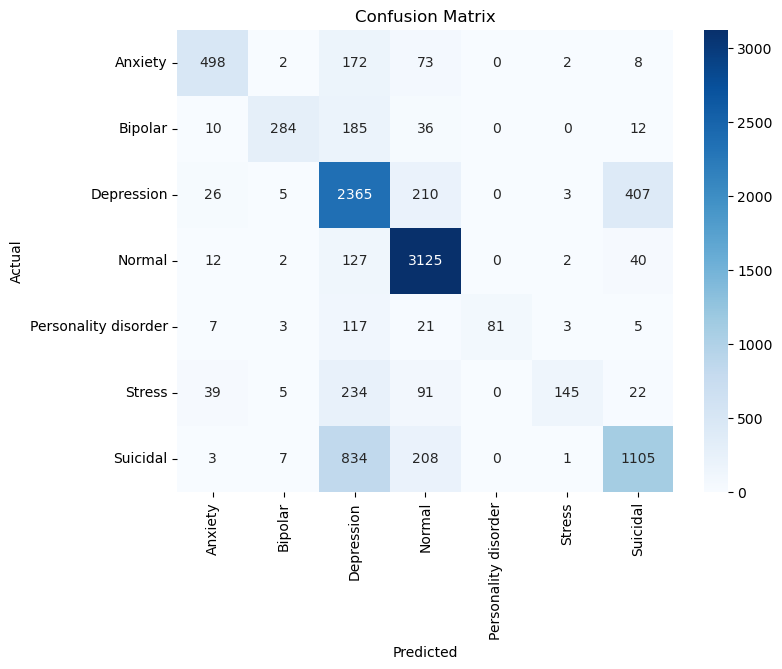

In [50]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       755
           1       0.92      0.54      0.68       527
           2       0.59      0.78      0.67      3016
           3       0.83      0.94      0.88      3308
           4       1.00      0.34      0.51       237
           5       0.93      0.27      0.42       536
           6       0.69      0.51      0.59      2158

    accuracy                           0.72     10537
   macro avg       0.83      0.58      0.64     10537
weighted avg       0.75      0.72      0.71     10537



### XGBClassifier

In [52]:
xgb = XGBClassifier()
xgb.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [53]:
y_pred=xgb.predict(X_test_tfidf)

In [54]:
accuracy_score(y_train, xgb.predict(X_train_tfidf))

0.8629698177676538

In [55]:
accuracy_score(y_test, xgb.predict(X_test_tfidf))

0.770143304545886

In [56]:
xgb_acc = accuracy_score(y_test, xgb.predict(X_test_tfidf))

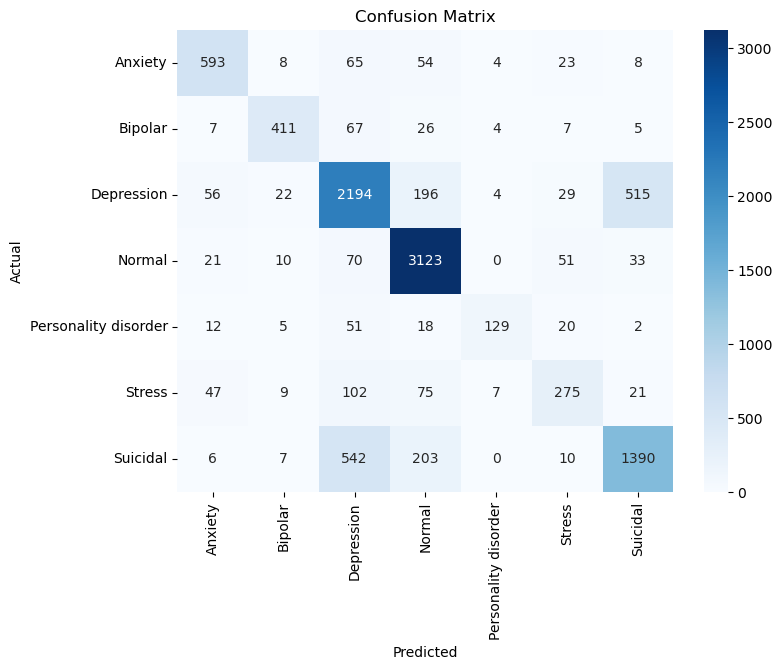

In [57]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       755
           1       0.87      0.78      0.82       527
           2       0.71      0.73      0.72      3016
           3       0.85      0.94      0.89      3308
           4       0.87      0.54      0.67       237
           5       0.66      0.51      0.58       536
           6       0.70      0.64      0.67      2158

    accuracy                           0.77     10537
   macro avg       0.78      0.71      0.74     10537
weighted avg       0.77      0.77      0.77     10537



### MultinomialNB

In [59]:
Mn = MultinomialNB()
Mn.fit(X_train_tfidf, y_train)

MultinomialNB()

In [60]:
y_pred = Mn.predict(X_test_tfidf)

In [61]:
accuracy_score(y_train, Mn.predict(X_train_tfidf))

0.7097570235383447

In [62]:
accuracy_score(y_test, Mn.predict(X_test_tfidf))

0.6654645534782196

In [63]:
Mn_acc = accuracy_score(y_test, Mn.predict(X_test_tfidf))

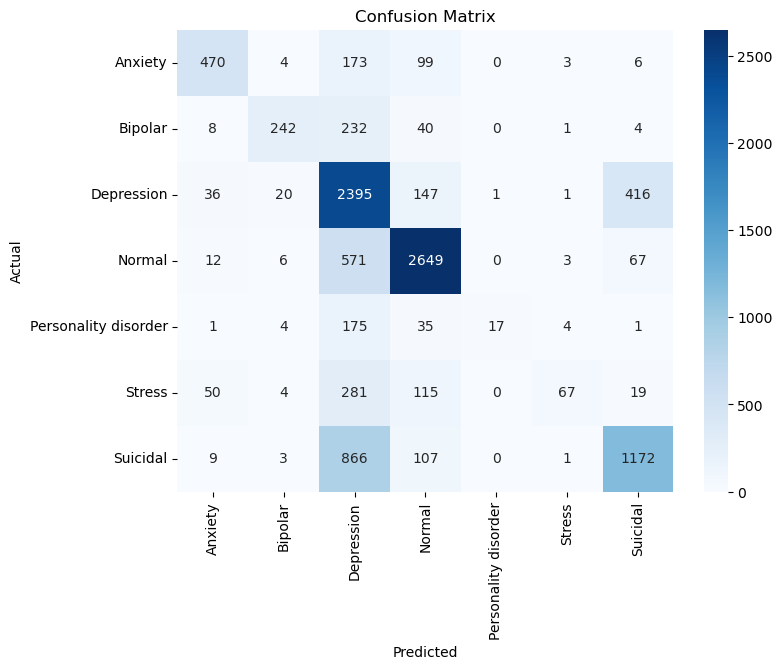

In [64]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70       755
           1       0.86      0.46      0.60       527
           2       0.51      0.79      0.62      3016
           3       0.83      0.80      0.82      3308
           4       0.94      0.07      0.13       237
           5       0.84      0.12      0.22       536
           6       0.70      0.54      0.61      2158

    accuracy                           0.67     10537
   macro avg       0.78      0.49      0.53     10537
weighted avg       0.71      0.67      0.65     10537



# Model Comparison

In [66]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBClassifier', 'MultinomialNB'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 100*round(xgb_acc,4), 100*round(Mn_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,XGBClassifier,77.01
0,Logistic Regression,75.74
3,Random Forest Classifier,72.16
5,MultinomialNB,66.55
2,Decision Tree Classifier,66.07
1,KNN,33.37


In [67]:
import pickle
model = xgb
pickle.dump(model, open("mental_health_model.pkl",'wb'))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

### TESTING

In [68]:
loaded_model = pickle.load(open("mental_health_model.pkl", "rb"))
loaded_tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

sample_text = ["i am feeling very good today"]
sample_tfidf = loaded_tfidf.transform(sample_text)
prediction = loaded_model.predict(sample_tfidf)
print("Predicted Status:", label_encoder.inverse_transform(prediction))

Predicted Status: ['Normal']
